## Logistic Regression on Real data Sets

In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [620]:
df = pd.read_csv("C:\\Users\PMLS\Desktop\Data_Sets\\titanic_train.csv")
df
df.drop(['Name'  , 'Ticket' , 'Embarked']  ,inplace = True , axis = 1)

In [622]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin'],
      dtype='object')

In [624]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

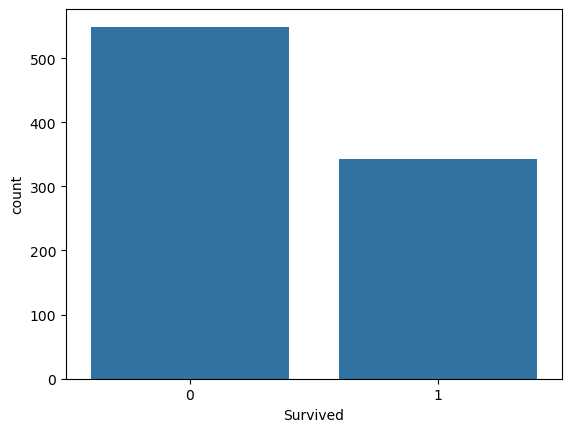

In [626]:
sns.countplot(x='Survived',data = df)

<Axes: xlabel='Survived', ylabel='count'>

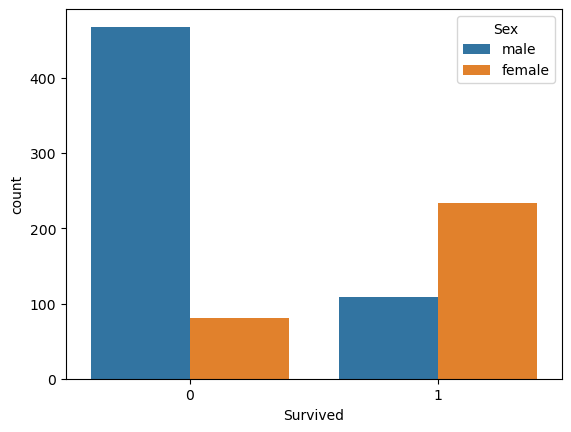

In [628]:
sns.countplot(x= 'Survived' , data = df , hue = 'Sex')

In [630]:
df.isna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,True
887,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,True
889,False,False,False,False,False,False,False,False,False


In [632]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
dtype: int64

<Axes: >

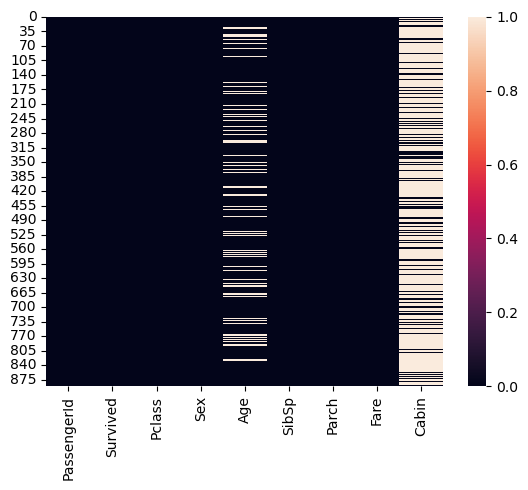

In [634]:
sns.heatmap(df.isna())

In [636]:
(df['Age'].isna().sum()/len(df['Age']))*100

19.865319865319865

In [638]:
(df['Cabin'].isna().sum())/len(df['Cabin'])*100

77.10437710437711

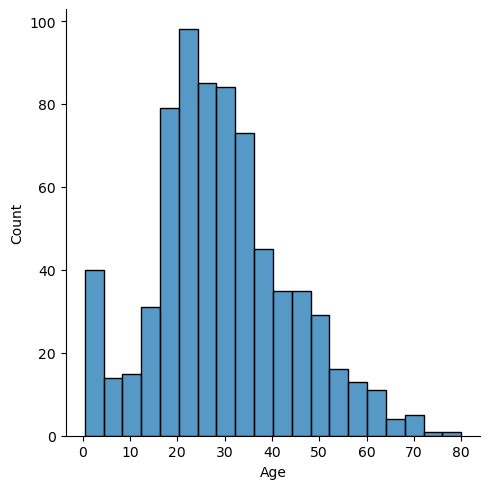

In [640]:
sns.displot(x = 'Age' , data = df)

In [642]:
#Data Cleaning
df['Age'].fillna(df['Age'].mean() , inplace = True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_15240\1505174200.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean() , inplace = True)


In [644]:
df['Age'].isna().sum()

0

In [646]:
df.drop('Cabin' , axis = 1, inplace = True)

In [648]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [650]:
gender=pd.get_dummies(df['Sex'],drop_first=True)

In [652]:
df['Gender'] = gender
df['Gender'] =df['Gender'].replace({True: 1, False: 0})

C:\Users\PMLS\AppData\Local\Temp\ipykernel_15240\2439105996.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] =df['Gender'].replace({True: 1, False: 0})


In [666]:
df.drop(['Sex'] ,axis = 1 , inplace = True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [668]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [670]:
X = df[['PassengerId','Pclass','Age','SibSp','Parch' , 'Fare', 'Gender']]
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [672]:
from sklearn.model_selection import train_test_split

In [674]:
X_train ,X_test, y_train   , y_test = train_test_split(X,y,test_size = 0.33 , random_state = 42) 

In [676]:
from sklearn.linear_model import LogisticRegression


In [678]:
lr =LogisticRegression()


In [680]:
lr.fit(X_train , y_train)


C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [682]:
prediction = lr.predict(X_test)

In [684]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test,prediction),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])


,Predicted No,Predicted Yes
Actual No,151,24
Actual Yes,38,82


In [686]:
TN = 151
TP = 82
FN = 38 
FP = 24
Accuracy  = (TP + TN)/(TN+TP+FN+FP)
Precision_Y = (TP/106)
Precision_N = (TN/189)

In [688]:
Accuracy*100,Precision_Y * 100,Precision_N * 100

(78.98305084745762, 77.35849056603774, 79.8941798941799)

In [690]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.77      0.68      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.77      0.78       295
weighted avg       0.79      0.79      0.79       295

